# Project: Anomalous Lines in APOGEE Spectra (ALIAS)

## About this tutorial:

This tutorial focuses on plotting, normalizing, and comparing the spectra of 10 stars.

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from astropy.table import Table
from astropy.io import fits

In [3]:
import matplotlib
matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

In [9]:
file = '../spectra/allStar-dr17-synspec_rev1.fits'

In [10]:
tbl = Table.read(file)

# Inspecting solar-like stars within 300 pc

Stars within 300 pc with $BP - RP$ around 0.82 +/- 0.01, and $M_G$ between 5 and 4.

What's the difference between `GAIAEDR3_R_MED_PHOTOGEO` and `GAIAEDR3_R_HI_PHOTOGEO`?

In [11]:
n300pc = ((tbl['GAIAEDR3_R_HI_PHOTOGEO'] <= 300) & 
         (((tbl['GAIAEDR3_R_HI_PHOTOGEO'] - tbl['GAIAEDR3_R_MED_PHOTOGEO'])/tbl['GAIAEDR3_R_HI_PHOTOGEO']) < 0.01) &
         (tbl['GAIAEDR3_PHOT_BP_MEAN_MAG'] - tbl['GAIAEDR3_PHOT_RP_MEAN_MAG'] < (0.82+0.01)) & 
         (tbl['GAIAEDR3_PHOT_BP_MEAN_MAG'] - tbl['GAIAEDR3_PHOT_RP_MEAN_MAG'] > (0.82-0.01)) & 
         ((tbl['GAIAEDR3_PHOT_G_MEAN_MAG'] - 5.* np.log10(tbl['GAIAEDR3_R_MED_PHOTOGEO'])+5) < 5) &
         ((tbl['GAIAEDR3_PHOT_G_MEAN_MAG'] - 5.* np.log10(tbl['GAIAEDR3_R_MED_PHOTOGEO'])+5) > 4)
        )

print('This many stars within 300 pc have solar-like properties:', sum(n300pc))
print('This many stars within 300 pc with solar-like properties have an absolute G magnitude > 4.4 mag:', sum(tbl['LOGG'][n300pc] > 4.4))

This many stars within 300 pc have solar-like properties: 1730
This many stars within 300 pc with solar-like properties have an absolute G magnitude > 4.4 mag: 907


Text(0, 0.5, 'log g (surface gravity)')

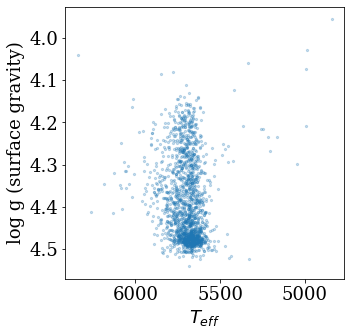

In [12]:
# an HR diagram of the stars in n300pc

plt.figure(figsize=(5,5))
plt.scatter(tbl['TEFF'][n300pc], 
            tbl['LOGG'][n300pc],
            s=5, alpha=0.25)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
# plt.xlim(8000,2000)
plt.xlabel('$T_{eff}$')
plt.ylabel('log g (surface gravity)')
#plt.savefig('hrd2.png',dpi=150,bbox_inches='tight')

In [13]:
# these are the files to pull for the stars in n300pc

tbl['FILE'][n300pc]

apStar-dr17-2M00030035+1554160.fits
apStar-dr17-2M00061847+1539108.fits
apStar-dr17-2M00091408+1445260.fits
apStar-dr17-2M00115214+8520020.fits
asStar-dr17-2M00124050-1948017.fits
apStar-dr17-2M00125570-1441121.fits
apStar-dr17-2M00164036+1612307.fits
apStar-dr17-2M00203029-0030022.fits
asStar-dr17-2M00241591-7717498.fits
apStar-dr17-2M00252721+1347329.fits
apStar-dr17-2M00275854+0002391.fits


# Inspecting individual spectra

Refer to the data model for individual spectra [here](https://data.sdss.org/datamodel/files/APOGEE_REDUX/APRED_VERS/stars/TELESCOPE/FIELD/apStar.html#hdu1).

## Construct URLs for data

https://www.sdss.org/dr17/irspec/spectro_data/#ScienceArchiveServer(SAS)

In [14]:
# so we can construct URLs for data: https://www.sdss.org/dr17/irspec/spectro_data/#ScienceArchiveServer(SAS)

TELESCOPE = tbl['TELESCOPE'][n300pc]
FIELD = tbl['FIELD'][n300pc]
FILE = tbl['FILE'][n300pc]

u1 = 'https://data.sdss.org/sas/dr17/apogee/spectro/redux/dr17/stars/'

URL = np.array([], dtype=str)
for k in range(sum(n300pc)):
    URL = np.append(URL, u1 + TELESCOPE[k] + '/' + FIELD[k] + '/' + FILE[k])

In [15]:
URL # URLs to download individual spectra of the stars in n300pc

array(['https://data.sdss.org/sas/dr17/apogee/spectro/redux/dr17/stars/apo25m/107-46_MGA/apStar-dr17-2M00030035+1554160.fits',
       'https://data.sdss.org/sas/dr17/apogee/spectro/redux/dr17/stars/apo25m/107-46_MGA/apStar-dr17-2M00061847+1539108.fits',
       'https://data.sdss.org/sas/dr17/apogee/spectro/redux/dr17/stars/apo25m/107-46_MGA/apStar-dr17-2M00091408+1445260.fits',
       ...,
       'https://data.sdss.org/sas/dr17/apogee/spectro/redux/dr17/stars/apo25m/K2_C12_083-66_btx/apStar-dr17-2M23523724-0804310.fits',
       'https://data.sdss.org/sas/dr17/apogee/spectro/redux/dr17/stars/apo25m/K2_C12_089-63_btx/apStar-dr17-2M23543349-0443238.fits',
       'https://data.sdss.org/sas/dr17/apogee/spectro/redux/dr17/stars/lco25m/SMC12/asStar-dr17-2M23543523-7307421.fits'],
      dtype='<U125')

In [16]:
# command to download the spectra in terminal
for url in URL[:10]:
    print('curl -O '+url)

curl -O https://data.sdss.org/sas/dr17/apogee/spectro/redux/dr17/stars/apo25m/107-46_MGA/apStar-dr17-2M00030035+1554160.fits
curl -O https://data.sdss.org/sas/dr17/apogee/spectro/redux/dr17/stars/apo25m/107-46_MGA/apStar-dr17-2M00061847+1539108.fits
curl -O https://data.sdss.org/sas/dr17/apogee/spectro/redux/dr17/stars/apo25m/107-46_MGA/apStar-dr17-2M00091408+1445260.fits
curl -O https://data.sdss.org/sas/dr17/apogee/spectro/redux/dr17/stars/apo25m/N188/apStar-dr17-2M00115214+8520020.fits
curl -O https://data.sdss.org/sas/dr17/apogee/spectro/redux/dr17/stars/lco25m/066-79/asStar-dr17-2M00124050-1948017.fits
curl -O https://data.sdss.org/sas/dr17/apogee/spectro/redux/dr17/stars/apo25m/090-75/apStar-dr17-2M00125570-1441121.fits
curl -O https://data.sdss.org/sas/dr17/apogee/spectro/redux/dr17/stars/apo25m/111-47_MGA/apStar-dr17-2M00164036+1612307.fits
curl -O https://data.sdss.org/sas/dr17/apogee/spectro/redux/dr17/stars/apo25m/107-62_MGA/apStar-dr17-2M00203029-0030022.fits
curl -O https:

# Opening the downloaded individual visit spectra

In [30]:
spectra_10 = tbl['FILE'][n300pc][:10]
spectra_10 # table of the file names of the 10 spectra

apStar-dr17-2M00030035+1554160.fits
apStar-dr17-2M00061847+1539108.fits
apStar-dr17-2M00091408+1445260.fits
apStar-dr17-2M00115214+8520020.fits
asStar-dr17-2M00124050-1948017.fits
apStar-dr17-2M00125570-1441121.fits
apStar-dr17-2M00164036+1612307.fits
apStar-dr17-2M00203029-0030022.fits
asStar-dr17-2M00241591-7717498.fits
apStar-dr17-2M00252721+1347329.fits


In [33]:
for spec_file in spectra_10:
    hdul = fits.open('../spectra/' + spec_file)
    print(len(Table.read(hdul)))
    # length of table corresponds to number of visits

2
2
2
14
3
5
2
3
5
3


# Inspecting the star with 14 visits

In [36]:
hdul = fits.open('../spectra/' + spectra_10[3])
Table.read(hdul)

filename,jd,snr,vhelio,vrel,vrelerr,teff,tefferr,logg,loggerr,feh,feherr,chisq,bc,x_ccf [765],ccf [765],ccferr [765],xcorr_vrel,xcorr_vrelerr,xcorr_vhelio,ccpfwhm,autofwhm,autoccf [765]
str72,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
apVisit-dr17-7950-57295-219.fits,2457295.83678,100.688,-14.792318244408214,-26.271292586754406,0.033304554053212386,5846.994705762229,5.169604364857971,4.592389364346806,0.0048302896188788915,-0.5146280110575051,0.0025133288112734195,1.4452328771705123,11.478974342346191,-987.0752527512955 .. 1015.1462080661221,-0.0035277302030462133 .. 0.011240210425074126,0.0022024343427712273 .. 0.0023964902843669816,-26.271292586754406,0.058090637862174895,-14.792318244408214,24.756291785526077,22.86194935141968,-0.0219168462467624 .. -0.0021146127897947835
apVisit-dr17-9084-57556-219.fits,2457556.73153,55.5578,-14.855711446056365,-16.439396486530303,0.06074970078752717,5846.994705762229,5.169604364857971,4.592389364346806,0.0048302896188788915,-0.5146280110575051,0.0025133288112734195,1.1559484277548837,1.583685040473938,-995.1388757749365 .. 1007.3647005546475,-0.004496282534329656 .. 0.007351646179191863,0.003529550748973512 .. 0.003802435013093016,-16.439396486530303,0.06244759114350199,-14.855711446056365,24.875816258518384,22.86827320284898,-0.03460103602553963 .. -0.0012002462040552504
apVisit-dr17-9082-57789-214.fits,2457789.82423,92.97,-14.836779817725684,-4.430003389503028,0.03578920756470323,5846.994705762229,5.169604364857971,4.592389364346806,0.0048302896188788915,-0.5146280110575051,0.0025133288112734195,1.413388648450167,-10.406776428222656,-1008.0828240760931 .. 994.1334762230961,-0.006234676414151815 .. 0.00545209091562896,0.0023309207588637325 .. 0.0025290219207501487,-4.430003389503028,0.047450123141141734,-14.836779817725684,24.10756915735096,22.780237658285554,-0.0299717932399381 .. -0.008495938173703081
apVisit-dr17-9083-57887-225.fits,2457887.90412,56.6589,-14.75435679753082,-9.569924767806699,0.07462218552415549,5846.994705762229,5.169604364857971,4.592389364346806,0.0048302896188788915,-0.5146280110575051,0.0025133288112734195,1.1941076784722802,-5.184432029724121,-1002.614279424828 .. 999.3087468013127,-0.003148723270220982 .. 0.004580411546294223,0.003504379402746489 .. 0.003852986396929649,-9.569924767806699,0.04989642003326039,-14.75435679753082,26.726491181588305,25.771992430526225,-0.03556255987147342 .. -0.003543020853512626
apVisit-dr17-7950-58060-220.fits,2458060.74255,97.5135,-14.78068348400162,-22.146279778404697,0.03519189497333938,5846.994705762229,5.169604364857971,4.592389364346806,0.0048302896188788915,-0.5146280110575051,0.0025133288112734195,1.3996870826515597,7.365596294403076,-989.5137083148614 .. 1012.3573426818505,-0.007610288486039859 .. 0.01411896937972574,0.0022345528130142314 .. 0.002426368318753561,-22.146279778404697,0.022636453031432923,-14.78068348400162,24.125335437153584,23.12268423005276,-0.026976584776802634 .. -0.002147973907947045
apVisit-dr17-7950-58085-220.fits,2458085.69004,105.643,-14.816924321271596,-17.38966702184838,0.03247046122225964,5846.994705762229,5.169604364857971,4.592389364346806,0.0048302896188788915,-0.5146280110575051,0.0025133288112734195,1.4726767568062704,2.5727427005767822,-994.7900009998408 .. 1007.0801342472898,-0.011778724170582372 .. 0.011132320756976791,0.002092614080902775 .. 0.0022764271338076964,-17.38966702184838,0.026857275991645106,-14.816924321271596,23.913751576216455,23.12067166112822,-0.03490943216284107 .. -0.0017301852580538304
apVisit-dr17-9135-58295-214.fits,2458295.76875,52.9173,-14.739431315129963,-18.013257675832477,0.06410164940816727,5846.994705762229,5.169604364857971,4.592389364346806,0.0048302896188788915,-0.5146280110575051,0.0025133288112734195,1.2310611973830006,3.2738263607025146,-994.6225894312446 .. 1007.0638619075564,-0.008606042003202353 .. 0.011990024107076301,

In [55]:
# spectra are in the 1st extension
sp = hdul[1].data
sp.shape

(16, 8575)

Combined and individual spectra for star, at apStar sampling. Each spectrum has 8575 columns with the spectra, and 2+NVISITS rows. The first two rows are both combined spectra, with different weighting: first row uses pixel-based weighting, while second uses a more "global" weighting. If NVISITS=1, there will only be one row.

Text(0, 0.5, 'Flux (10^-17 erg/s/cm^2/Ang)')

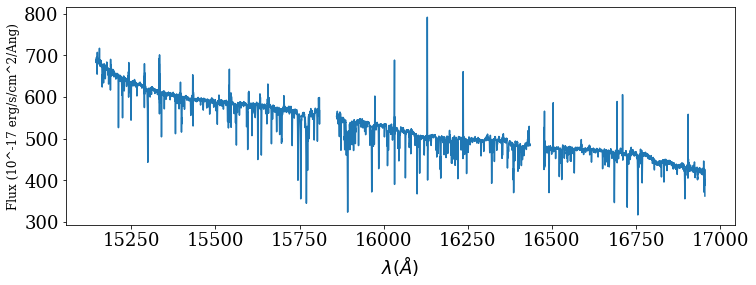

In [37]:
# reconstruct the wavelength axis from the header - NOTE: doesn't work for apVisit files!
wave = 10**(hdul[1].header['CRVAL1'] + (hdul[1].header['CDELT1'] * np.arange(sp.shape[1])))

plt.figure(figsize=(12,4))

# combined spectra are in the first column
plt.plot(wave, sp[0])

plt.xlabel('$\lambda (\AA)$')
plt.ylabel(hdul[1].header['BUNIT'],fontsize=12)
#plt.savefig("spectrum.png")

Text(0, 0.5, 'Flux (10^-17 erg/s/cm^2/Ang)')

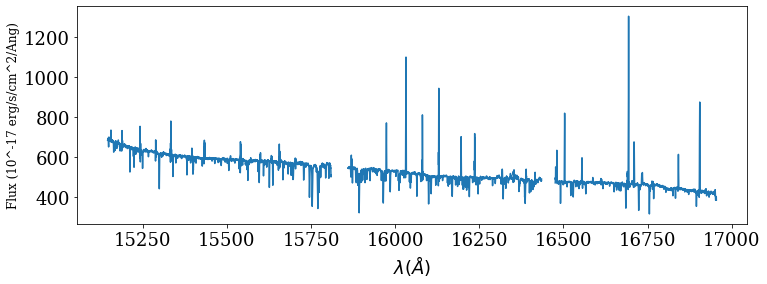

In [67]:
plt.figure(figsize=(12,4))

# combined spectra in the 2nd column
plt.plot(wave, sp[1])

plt.xlabel('$\lambda (\AA)$')
plt.ylabel(hdul[1].header['BUNIT'],fontsize=12)
#plt.savefig("spectrum.png")

# Plotting all 10 spectra

In [81]:
def reconstruct_wavelength_axis(hdul):
    wave = 10**(hdul[1].header['CRVAL1'] + (hdul[1].header['CDELT1'] * np.arange(sp.shape[1])))
    print('Individual spectra', spec_file, 'has', len(Table.read(hdul)), 'visits, CRVAL1 of', hdul[1].header['CRVAL1'], 'and CDELT1 of', hdul[1].header['CDELT1'])
    return wave

Individual spectra apStar-dr17-2M00030035+1554160.fits has 2 visits, CRVAL1 of 4.179 and CDELT1 of 6e-06
Individual spectra apStar-dr17-2M00061847+1539108.fits has 2 visits, CRVAL1 of 4.179 and CDELT1 of 6e-06
Individual spectra apStar-dr17-2M00091408+1445260.fits has 2 visits, CRVAL1 of 4.179 and CDELT1 of 6e-06
Individual spectra apStar-dr17-2M00115214+8520020.fits has 14 visits, CRVAL1 of 4.179 and CDELT1 of 6e-06
Individual spectra asStar-dr17-2M00124050-1948017.fits has 3 visits, CRVAL1 of 4.179 and CDELT1 of 6e-06
Individual spectra apStar-dr17-2M00125570-1441121.fits has 5 visits, CRVAL1 of 4.179 and CDELT1 of 6e-06
Individual spectra apStar-dr17-2M00164036+1612307.fits has 2 visits, CRVAL1 of 4.179 and CDELT1 of 6e-06
Individual spectra apStar-dr17-2M00203029-0030022.fits has 3 visits, CRVAL1 of 4.179 and CDELT1 of 6e-06
Individual spectra asStar-dr17-2M00241591-7717498.fits has 5 visits, CRVAL1 of 4.179 and CDELT1 of 6e-06
Individual spectra apStar-dr17-2M00252721+1347329.fits

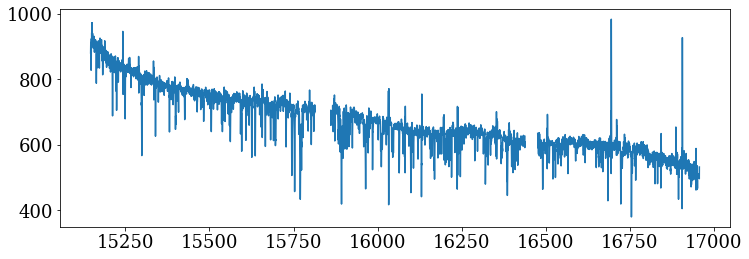

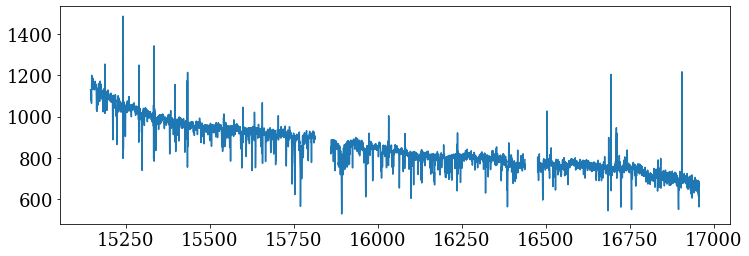

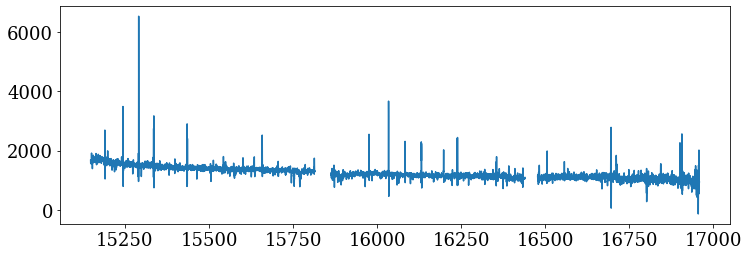

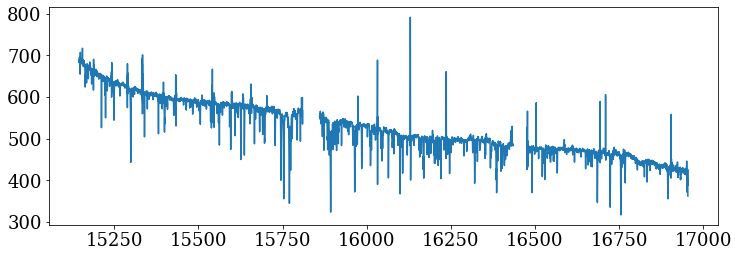

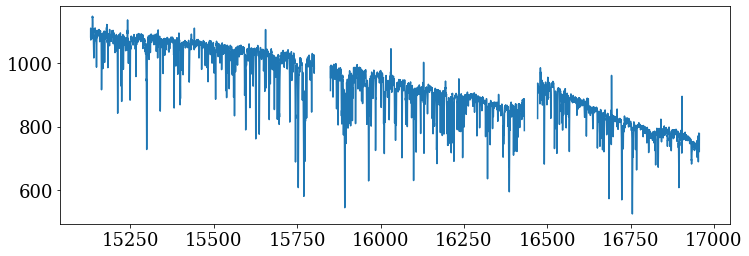

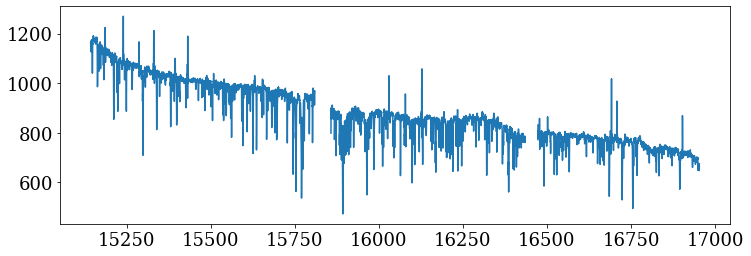

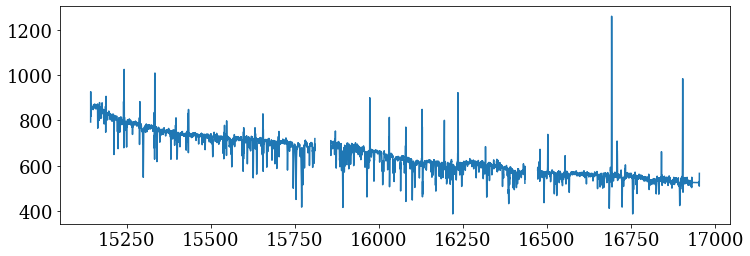

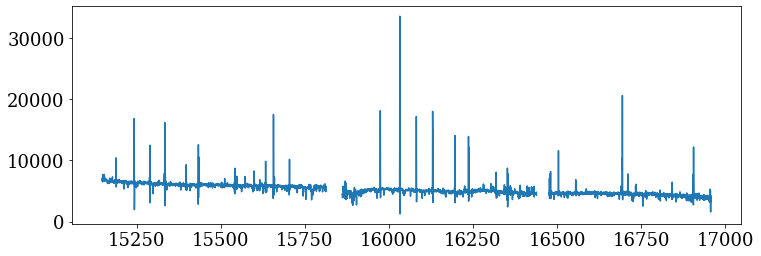

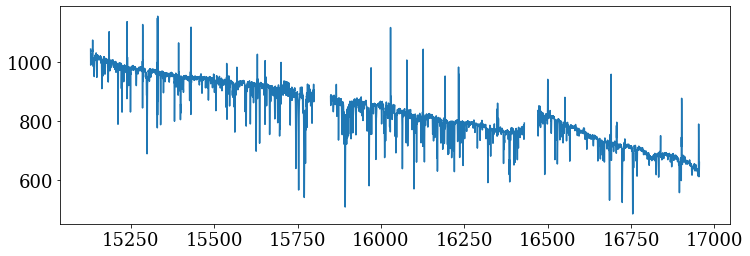

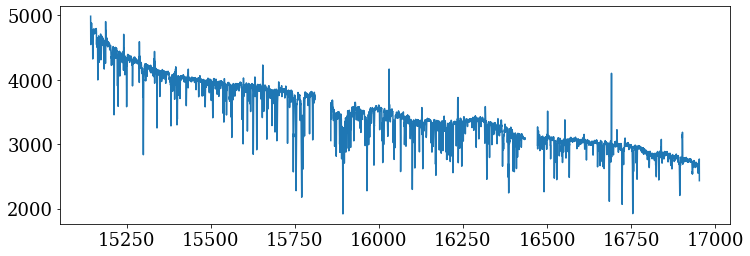

In [82]:
for spec_file in spectra_10:
    hdul = fits.open('../spectra/' + spec_file)
    sp = hdul[1].data
    w = reconstruct_wavelength_axis(hdul)
    fig, ax = plt.subplots(figsize=(12,4))
    ax.plot(w, sp[0])